<a href="https://www.nvidia.com/en-us/deep-learning-ai/education/"> <img src="images/DLI Header.png" alt="Header" style="width: 400px;"/> </a>

# Improving your Model

Now that you've learned to successfully train a model, let's work towards a state of the art model. In this lab, we'll learn the levers that you, as a deep learning practitioner, will use to navigate towards desired results. In the process, we'll start to peel back the layers around the technology that makes this possible.

Let's bring back our dog/cat classifier. 

## [Start from DIGITS' home screen](/digits/)

Choose the model you created, "Dogs vs. Cats".

Among other things, DIGITS will display the graph that was generated as the model was being trained. 

![](images/graphfromfirsttraining.png)

Three quantities are reported: training loss, validation loss, and accuracy.  The values of training and validation loss should have decreased from epoch to epoch, although they may jump around some.  The accuracy is the measure of the ability of the model to correctly classify the validation data.  If you hover your mouse over any of the data points, you will see its exact value.  In this case, the accuracy at the last epoch is about 80%.  Your results might be slightly different than what is shown here since the initial networks are generated randomly.

Analyzing this graph, one thing that jumps out is that accuracy is increasing over time and that loss is decreasing. A natural question may be, "will the model keep improving if we let it train longer?" This is the first intervention that we'll experiment with and discuss. 

## Study more

Following the advice of parents and teachers everywhere, let's work to improve the accuracy of our model by asking it to study more. 

An **epoch** is one complete presentation of the data through the network. Earlier in the course, we compared one epoch through one trip through a deck of flashcards. "Studying more" would entail running more epochs from where our model last left off. 

To gain access to that *state*, scroll to the bottom of your model page and click the big green button labeled: "Make Pretrained Model."

![](images/pretrainedbutton.PNG)

This will save two things:

1. The "network architecture" that you chose when selecting "AlexNet."
2. What the model has "learned" in the form of the parameters that have been adjusted as your network worked through the data in the first 5 epochs.

### Learning rate

Along with the current state of the model, it is important to understand how it was changing. Take a look at the graph below the training graph:

![](images/learningrate.png)

You may be wondering three things:

1) What is "learning rate?"  
2) Why does the learning rate decrease throughout the training session?  
3) Who controls that?  

1) Learning rate is the rate at which each "weight" changes during training. Each weight is moving in the direction that reduces loss at a value multiplied by the learning rate.  
2) The learning rate decreases throughout the training session because the network is getting closer to its ideal solution. At first, the network being trained knows *nothing* about what it may see. Nevermind dogs, it doesn't know whether it's about to see images or sensor data, etc. Large jumps towards the ideal solution make sense. After a few epochs, the weights are getting better so it's important for the network to *be less reactive* to each image it sees.  
3) You control the learning rate. The learning rate is one of many "hyperparameters" that we set when setting up the training session.  We'll make an adjustment to it in just a minute. Here's why.  

Since at the end of the session the learning rate was slow, when starting from a pretrained network, we should pick up where we left off. Let's set up a training job from this pretrained model starting at the learning rate of .0001.  

## Starting from a pretrained model

We can now create a new model from this starting point. Go back to DIGITS' home screen by selecting "DIGITS" in the top left corner and create a new Image Classification model like before. 

**New Model (Images) -> Classification **

- Select the same dataset - (Dogs and Cats)
- Choose some number of epochs between 3 and 8. (Note that in creating a model from scratch, this is where you could have requested more epochs originally.)
- Change the learning rate to 0.0001  
- Select "advanced options" to "fix" the learning rate at that value  
- This time, instead of choosing a "Standard Network," select "Pretrained Networks." 
- Select the pretrained model that you just created, "Dogs vs. Cats".
- Name your model - We chose "Study more"
- Click Create

Your settings should look like:

![](images/pretrainedmodelsetup.png)

When you create the model, you'll get the following graph. 

![](images/pretrainedgraph.PNG)

Note the following:

1. As expected, the accuracy starts close to where our first model left off, 80%.  
2. Accuracy DOES continue to increase, showing that increasing the number of epochs often does increase performance.  
3. The *rate* of increase in accuracy slows down, showing that more trips through the same data can't be the only way to increase performance.   

There are four categories of levers that you can manipulate to improve performance. Time spent learning about each of them will pay off in the performance of your models.  

1) **Data** - A large and diverse enough dataset to represent the environment where our model should work. Data curation is an art form in itself.    
2) **Hyperparameters** - Making changes to options like learning rate are like changing your training "style." Currently, finding the right hyperparameters is a manual process learned through experimentation. As you build intuition about what types of jobs respond well to what hyperparameters, your performance will increase.  
3) **Training time** - More epochs improve performance to a point. At some point, too much training will result in overfitting (humans are guilty of this too), so this can not be the only intervention you apply.  
4) **Network architecture** - We'll begin to experiment with network architecture in the next section. This is listed as the last intervention to push back against a false myth that to engage in solving problems with deep learning, people need mastery of network architecture. This field is fascinating and powerful, and improving your skills is a study in math.  

## Deploying award winning models

Instead of working through the deployment of the model you just retrained, it's time to introduce a shortcut to performance: deploying expert pretrained models.

In this section, you'll learn to deploy other people's networks so that you can get the performance gains of their research, compute time, and data curation.

Recall that the specific deep learning workflow this course started with is *image classification.* One reason we start with this task is because it is one of the most solved challenges in Deep Learning. It has benefited from the research community refining solutions to a competition called ["ImageNet."](https://qz.com/1034972/the-data-that-changed-the-direction-of-ai-research-and-possibly-the-world/)

"ImageNet" is a large dataset with 1000 classes of common images. The competition granted awards for the research teams that had the lowest loss against this dataset. The network we have been working with, AlexNet, won Imagenet in 2012. Teams from Google and Microsoft have been winners since then. 

Here's the exciting part. Not only can we use their network architecture, we can even use their trained weights, acquired through the manipulation of the four levers above: data, hyperparameters, training time, and network architecture. Without any training or data collection, we can *deploy* award winning neural networks.

All we need to deploy one of these models are the model's architecture and weights. A quick Google search for "pretrained model alexnet imagenet caffe" returns multiple pages to download this model.

We'll download them both using a tool called wget. Wget is a great way of downloading data from the web directly to the server you're working on without pulling it to your local machine first. 

In [1]:
!wget http://dl.caffe.berkeleyvision.org/bvlc_alexnet.caffemodel
!wget https://raw.githubusercontent.com/BVLC/caffe/master/models/bvlc_alexnet/deploy.prototxt

--2019-02-01 18:23:47--  http://dl.caffe.berkeleyvision.org/bvlc_alexnet.caffemodel
Resolving dl.caffe.berkeleyvision.org (dl.caffe.berkeleyvision.org)... 169.229.222.251
Connecting to dl.caffe.berkeleyvision.org (dl.caffe.berkeleyvision.org)|169.229.222.251|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243862414 (233M) [application/octet-stream]
Saving to: ‘bvlc_alexnet.caffemodel’

bvlc_alexnet.caffem 100%[===================>] 232.56M  16.0MB/s    in 16s     

2019-02-01 18:24:03 (14.6 MB/s) - ‘bvlc_alexnet.caffemodel’ saved [243862414/243862414]

--2019-02-01 18:24:03--  https://raw.githubusercontent.com/BVLC/caffe/master/models/bvlc_alexnet/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3629 (3.5K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.

Those are the same two files that DIGITS generated when we trained a model from scratch. The only other file we took from DIGITS was the mean image that was used during training. We can download that below.

In [2]:
!wget https://github.com/BVLC/caffe/blob/master/python/caffe/imagenet/ilsvrc_2012_mean.npy?raw=true
!mv ilsvrc_2012_mean.npy?raw=true ilsvrc_2012_mean.npy

--2019-02-01 18:24:11--  https://github.com/BVLC/caffe/blob/master/python/caffe/imagenet/ilsvrc_2012_mean.npy?raw=true
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BVLC/caffe/raw/master/python/caffe/imagenet/ilsvrc_2012_mean.npy [following]
--2019-02-01 18:24:11--  https://github.com/BVLC/caffe/raw/master/python/caffe/imagenet/ilsvrc_2012_mean.npy
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BVLC/caffe/master/python/caffe/imagenet/ilsvrc_2012_mean.npy [following]
--2019-02-01 18:24:12--  https://raw.githubusercontent.com/BVLC/caffe/master/python/caffe/imagenet/ilsvrc_2012_mean.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercont

Those files are now all stored on this server as: <pre>/dli/tasks/task4/task/deploy.prototxt</pre><pre>/dli/tasks/task4/task/bvlc_alexnet.caffemodel</pre><pre>/dli/tasks/task4/task/ilsvrc_2012_mean.npy</pre>

Let's use what we already know about deployment to run an image through this model. Start by initializing the model:

In [3]:
import caffe
import numpy as np
caffe.set_mode_gpu()
import matplotlib.pyplot as plt #matplotlib.pyplot allows us to visualize results

ARCHITECTURE = 'deploy.prototxt'
WEIGHTS = 'bvlc_alexnet.caffemodel'
MEAN_IMAGE = 'ilsvrc_2012_mean.npy'
TEST_IMAGE = '/dli/data/BeagleImages/louietest2.JPG'

# Initialize the Caffe model using the model trained in DIGITS
net = caffe.Classifier(ARCHITECTURE, WEIGHTS) #Each "channel" of our images are 256 x 256

Then create an input the network expects. Note that this is different than the *preprocessing* used in the last model. To learn how imagenet was preprocessed, the documentation was clearly presented on the [Caffe website](http://caffe.berkeleyvision.org/gathered/examples/imagenet.html):

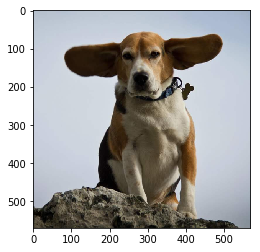

In [5]:
#Load the image
image= caffe.io.load_image(TEST_IMAGE)
plt.imshow(image)
plt.show()

#Load the mean image
mean_image = np.load(MEAN_IMAGE)
mu = mean_image.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values

# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR
# set the size of the input (we can skip this if we're happy with the default; we can also change it later, e.g., for different batch sizes)
net.blobs['data'].reshape(1,        # batch size
                          3,         # 3-channel (BGR) images
                          227, 227)  # image size is 227x227

transformed_image = transformer.preprocess('data', image)

Run the function and visualize the output.

In [6]:
# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = transformed_image

### perform classification
output = net.forward()

output

{'prob': array([[  2.31780262e-09,   2.58294519e-09,   3.19525961e-09,
           2.09216755e-09,   5.00786212e-09,   2.04342987e-09,
           2.37229258e-09,   9.16246246e-11,   4.86508278e-10,
           5.01131137e-09,   1.35739935e-08,   9.87543114e-09,
           3.42600948e-11,   1.11983944e-09,   3.58725938e-10,
           7.21391349e-11,   1.98810324e-09,   3.15641522e-08,
           3.18406670e-08,   7.21174453e-10,   8.27692492e-09,
           1.42624259e-08,   2.83560397e-09,   3.29977219e-08,
           3.40230094e-10,   7.50220686e-09,   9.47929624e-10,
           1.18161825e-09,   2.00934576e-08,   2.79246071e-10,
           1.43229650e-09,   2.25081864e-09,   8.54826698e-09,
           1.04760878e-09,   3.35014100e-10,   1.14679100e-10,
           8.23971502e-10,   2.29677444e-10,   1.93692991e-08,
           3.21901672e-10,   2.40228504e-09,   1.76278014e-09,
           2.23937793e-08,   5.04234487e-10,   4.73921236e-10,
           5.41517942e-10,   1.59301594e-09,   

### Work to make the output useful to a user.

What you see above is an array containing the probabilities that our image belongs to each of 1000 classes. Let's work to make this useful.

In [7]:
output_prob = output['prob'][0]  # the output probability vector for the first image in the batch
print 'predicted class is:', output_prob.argmax()

predicted class is: 162


This is closer. Take a look at imagenet's classes to see what that number corresponds to [here.](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) Better???? Let's add that functionality to our application so we have a useful end-to-end deployment.

Again using wget to get a dictionary (dict) of class to label.

In [8]:
!wget https://raw.githubusercontent.com/HoldenCaulfieldRye/caffe/master/data/ilsvrc12/synset_words.txt
labels_file = 'synset_words.txt'
labels = np.loadtxt(labels_file, str, delimiter='\t')

print 'output label:', labels[output_prob.argmax()]

--2019-02-01 18:27:06--  https://raw.githubusercontent.com/HoldenCaulfieldRye/caffe/master/data/ilsvrc12/synset_words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31675 (31K) [text/plain]
Saving to: ‘synset_words.txt’

synset_words.txt    100%[===================>]  30.93K  --.-KB/s    in 0.01s   

2019-02-01 18:27:06 (2.89 MB/s) - ‘synset_words.txt’ saved [31675/31675]

output label: n02088364 beagle


To get a clean view of what our application does, here is the input and output of our application.

Input image:


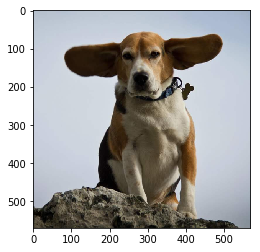

Output label:n02088364 beagle


In [9]:
print ("Input image:")
plt.imshow(image)
plt.show()

print("Output label:" + labels[output_prob.argmax()])

<a href="https://www.nvidia.com/en-us/deep-learning-ai/education/"> <img src="images/DLI Header.png" alt="Header" style="width: 400px;"/> </a>